In [1]:
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
import os
from pathlib import Path
from skimage.data import checkerboard

In [2]:
from CV.Vision import get_images, draw_bbox, draw_corners

# ChessReD

#### Read annotations

In [3]:
with open('DataSet/ChessReD/original/annotations.json', 'r') as f:
    CRD_json = json.load(f)

In [4]:
CRD_pieces = CRD_json['annotations']['pieces']
CRD_corners = CRD_json['annotations']['corners']
CRD_images = CRD_json['images']

In [5]:
CRD_pieces[-1]

{'image_id': 10799,
 'category_id': 7,
 'chessboard_position': 'd1',
 'id': 223803,
 'bbox': [581.57, 1188.01, 132.52, 209.77]}

In [27]:
CRD_corners[-1]

{'image_id': 10799,
 'corners': {'top_right': [2509.1, 1823.6],
  'bottom_right': [594.51, 2092.73],
  'top_left': [2005.33, 778.48],
  'bottom_left': [515.43, 938.19]},
 'id': 225881}

In [28]:
CRD_images[-1]

{'file_name': 'G099_IMG099.jpg',
 'path': 'images/99/G099_IMG099.jpg',
 'camera': 'Samsung Galaxy S8',
 'height': 3024,
 'width': 3024,
 'game_id': 99,
 'move_id': 99,
 'id': 10799}

#### NON/EXIST layout preprocessing

In [12]:
empty_bbox = []
exist_bbox = []
for pieces_on_image in CRD_pieces:
    image_id = pieces_on_image['image_id']
    file_name = CRD_images[image_id]['file_name'].strip('jpg')+'txt'
    width = CRD_images[image_id]['width']
    height = CRD_images[image_id]['height']

    resize_pieces = []
    if not ('bbox' in pieces_on_image):
        empty_bbox.append([pieces_on_image['id'], pieces_on_image['image_id']])
    else:
        exist_bbox.append([pieces_on_image['id'], pieces_on_image['image_id']])

In [13]:
empty_image = set()
for empty in empty_bbox:
    if not empty[1] in empty_image:
        empty_image.add(empty[1])

exist_image = set()
for empty in exist_bbox:
    if not empty[1] in exist_image:
        exist_image.add(empty[1])

#### Non layout images save

In [16]:
for id in list(empty_image):
    img = cv2.imread('DataSet/ChessReD/original/' + CRD_images[id]['path'])
    img = cv2.resize(img, (640, 640))
    cv2.imwrite('DataSet/ChessReD/non_layout_images/' + CRD_images[id]['file_name'], img)

G001_IMG000.jpg
G001_IMG001.jpg
G001_IMG002.jpg
G001_IMG003.jpg
G001_IMG004.jpg
G001_IMG005.jpg
G001_IMG006.jpg
G001_IMG007.jpg
G001_IMG008.jpg
G001_IMG009.jpg
G001_IMG010.jpg
G001_IMG011.jpg
G001_IMG012.jpg
G001_IMG013.jpg
G001_IMG014.jpg
G001_IMG015.jpg
G001_IMG016.jpg
G001_IMG017.jpg
G001_IMG018.jpg
G001_IMG019.jpg
G001_IMG020.jpg
G001_IMG021.jpg
G001_IMG022.jpg
G001_IMG023.jpg
G001_IMG024.jpg
G001_IMG025.jpg
G001_IMG026.jpg
G001_IMG027.jpg
G001_IMG028.jpg
G001_IMG029.jpg
G001_IMG030.jpg
G001_IMG031.jpg
G001_IMG032.jpg
G001_IMG033.jpg
G001_IMG034.jpg
G001_IMG035.jpg
G001_IMG036.jpg
G001_IMG037.jpg
G001_IMG038.jpg
G001_IMG039.jpg
G001_IMG040.jpg
G001_IMG041.jpg
G001_IMG042.jpg
G001_IMG043.jpg
G001_IMG044.jpg
G001_IMG045.jpg
G001_IMG046.jpg
G001_IMG047.jpg
G001_IMG048.jpg
G001_IMG049.jpg
G001_IMG050.jpg
G001_IMG051.jpg
G001_IMG052.jpg
G001_IMG053.jpg
G001_IMG054.jpg
G001_IMG055.jpg
G001_IMG056.jpg
G001_IMG057.jpg
G001_IMG058.jpg
G001_IMG059.jpg
G001_IMG060.jpg
G001_IMG061.jpg
G001_IMG

#### Separation: Train, Val, Test 

In [14]:
train = set()
val = set()
test = set()

np.random.seed(42)
shufle_exist_image = list(exist_image)
np.random.shuffle(shufle_exist_image)

c = 1
for i in shufle_exist_image:
    if c <= len(exist_image) * 0.7:
        train.add(i)
    elif len(exist_image) * 0.7 < c <= len(exist_image) * 0.85:
        val.add(i)
    else:
        test.add(i)
    c += 1

In [15]:
len(train) + len(val) + len(test)

2078

#### Save PIECES annotations

In [29]:
for pieces_on_image in CRD_pieces:
    image_id = pieces_on_image['image_id']
    file_name = CRD_images[image_id]['file_name'].strip('jpg')+'txt'
    width = CRD_images[image_id]['width']
    height = CRD_images[image_id]['height']

    resize_pieces = []
    
    if 'bbox' in pieces_on_image:

        resize_x = (pieces_on_image['bbox'][0] + pieces_on_image['bbox'][2]/2)/width
        resize_y = (pieces_on_image['bbox'][1] + pieces_on_image['bbox'][3]/2)/height
        resize_width  = pieces_on_image['bbox'][2]/width
        resize_height = pieces_on_image['bbox'][3]/height

        bbox = [resize_x, resize_y, resize_width, resize_height]
        category = pieces_on_image['category_id']

        if image_id in train:
            with open('DataSet/ChessReD/pieces/train/'+file_name,'a') as annotations:
                annotations.write(' '.join(list(map(str,([category] + bbox))))+'\n')

        if image_id in val:
            with open('DataSet/ChessReD/pieces/val/'+file_name,'a') as annotations:
                annotations.write(' '.join(list(map(str,([category] + bbox))))+'\n')

        if image_id in test:
            with open('DataSet/ChessReD/pieces/test/'+file_name,'a') as annotations:
                annotations.write(' '.join(list(map(str,([category] + bbox))))+'\n')


#### Save CORNERS annotations

In [33]:
for corners_on_image in CRD_corners:
    image_id = corners_on_image['image_id']
    file_name = CRD_images[image_id]['file_name'].strip('jpg')+'txt'
    width = CRD_images[image_id]['width']
    height = CRD_images[image_id]['height']

    resize_corners = []
    for coord in corners_on_image['corners'].values():
        resize_corners.append(coord[0]/width)
        resize_corners.append(coord[1]/height)

    resize_x = (max(resize_corners[::2]) + min(resize_corners[::2])) /2
    resize_y = (max(resize_corners[1::2])+ min(resize_corners[1::2]))/2
    resize_width  = (max(resize_corners[::2]) - min(resize_corners[::2])) + 0.075
    resize_height = (max(resize_corners[1::2])- min(resize_corners[1::2]))+ 0.075

    bbox = [resize_x, resize_y, resize_width, resize_height]

    if (bbox[0]+bbox[2]/2 > 1) or (bbox[1]+bbox[3]/2 > 1) or (bbox[0]-bbox[2]/2 < 0) or (bbox[1]-bbox[3]/2 < 0):
        print('wrong')

    new_resize_corners = []
    for i in range(len(resize_corners)):
        new_resize_corners.append(resize_corners[i])
        if i % 2 == 1:
            new_resize_corners.append(2.0)


    if image_id in train:
        with open('DataSet/ChessReD/corners/train/'+file_name,'a') as annotations:
            annotations.write(' '.join(list(map(str,([0] + bbox + resize_corners))))+'\n')

    if image_id in val:
        with open('DataSet/ChessReD/corners/val/'+file_name,'a') as annotations:
            annotations.write(' '.join(list(map(str,([0] + bbox + resize_corners))))+'\n')

    if image_id in test:
        with open('DataSet/ChessReD/corners/test/'+file_name,'a') as annotations:
            annotations.write(' '.join(list(map(str,([0] + bbox + resize_corners))))+'\n')

    

#### Save RESIZE images

In [23]:
for image in CRD_images:
    img = cv2.imread('DataSet/ChessReD/original/' + image['path'])
    img = cv2.resize(img, (640, 640))
    if image['id'] in train:
        cv2.imwrite('DataSet/ChessReD/pieces/train/' + image['file_name'], img)

    if image['id'] in val:
        cv2.imwrite('DataSet/ChessReD/pieces/val/' + image['file_name'], img)

    if image['id'] in test:
        cv2.imwrite('DataSet/ChessReD/pieces/test/' + image['file_name'], img)

#### Delete PIECES annotations

In [20]:
p = Path("DataSet/ChessReD/pieces")
for x in p.rglob("*.txt"):
    os.remove(x)



#### Delete CORNERS annotations

In [32]:
p = Path("DataSet/ChessReD/corners")
for x in p.rglob("*.txt"):
    os.remove(x)

#### Over

In [6]:
CRD_images[0]

{'file_name': 'G000_IMG000.jpg',
 'path': 'images/0/G000_IMG000.jpg',
 'camera': 'Huawei P40 pro',
 'height': 3072,
 'width': 3072,
 'game_id': 0,
 'move_id': 0,
 'id': 0}

In [5]:
CRD_corners[0]

{'image_id': 0,
 'corners': {'bottom_right': [2610.3, 1560.9],
  'top_right': [1772.23, 638.59],
  'top_left': [488.7, 1078.7],
  'bottom_left': [1063.3, 2304.1]},
 'id': 223804}

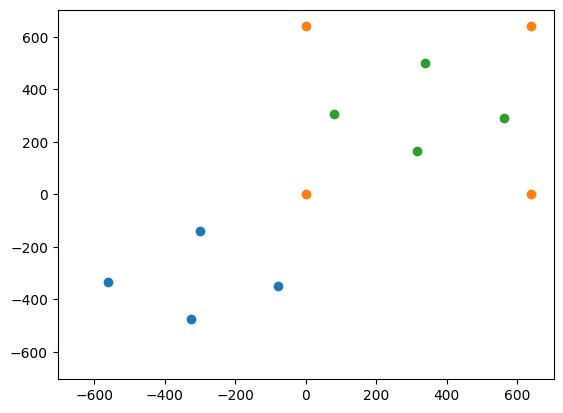

In [10]:
corners_dict = CRD_corners[80]
image_id = corners_dict['image_id']

corect_corners = lambda xy: np.array([int(xy[0]), int(xy[1])])

br = corect_corners(corners_dict['corners']['bottom_right'])
tr = corect_corners(corners_dict['corners']['top_right'])
tl = corect_corners(corners_dict['corners']['top_left'])
bl = corect_corners(corners_dict['corners']['bottom_left'])

img = cv2.imread('DataSet/ChessReD/original/'+CRD_images[image_id]['path'])

w, h = img.shape[0], img.shape[1]

def resize_xy(xy_list:list, w:int, h:int):
    ans = []
    for xy in xy_list:
        ans.append([int(xy[0]*(640/w)), int(xy[1]*(640/h))])
    ans = np.array(ans, dtype=np.float32)
    return ans


src = resize_xy([br, tr, tl, bl], w, h)

w, h = 640, 640

dst = np.array(
    [[w, h],
     [w, 0], 
     [0, 0], 
     [0, h]],
    dtype=np.float32)


m_invervse = cv2.getPerspectiveTransform(dst, src)
m_direct = cv2.getPerspectiveTransform(src, dst)

invervse = cv2.perspectiveTransform(dst[None, :, :], m_invervse)
direct = cv2.perspectiveTransform(src[None, :, :], m_direct)

x_invervse, y_invervse = invervse.transpose() - w
x_direct, y_direct = direct.transpose()
x_src, y_src = src.transpose()

plt.ylim((-h*1.1,h*1.1))
plt.xlim((-w*1.1,w*1.1))

plt.scatter(x_invervse, y_invervse)
plt.scatter(x_direct, y_direct)
plt.scatter(x_src, y_src)


img = cv2.resize(img, (640, 640))
img1 = cv2.warpPerspective(img, m_direct,(h, w))
cv2.imshow('Original Image', img)
cv2.imshow('Transformed Image', img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Synthetic

# Green Field Detection

# Green Field Real Game

# Noise Chess Detection

# Video Chess Detection